In [7]:
from util.helper import extract_word_statistics, transform_wortschatz_leipzig, collect_sentences_by_confusion_sets, load_confusion_sets_from_file

import os
import pandas as pd
import spacy

/Users/dgardner/GitHub/catalpa-cl/rwse-experiments/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 10k WL

In [2]:
file_name = 'input/eng_news_2023_10K-sentences.txt'

file_name_transformed = file_name + '_transformed'
if not os.path.isfile(file_name_transformed):
    transform_wortschatz_leipzig(file_name)

with open('input/confusion_sets_modified.csv', 'r') as f:
    word_list = []
    for line in f.readlines():
        word_list.extend(line.strip().split(','))



file_name = 'output/report_word_statistics_10k_23.csv'

if not os.path.isfile(file_name):
    nlp = spacy.load('en_core_web_sm')
    temp_df = extract_word_statistics(file_name_transformed, nlp, word_list)
    temp_df.to_csv(file_name, index=False, mode='x')
else:
    temp_df = pd.read_csv(file_name)

temp_df

,word,frequency
0,accept,9
1,advice,20
2,advise,1
3,affect,9
4,affects,4
...,...,...
97,with,1556
98,word,20
99,world,147
100,you,737


#### 1M WL

In [3]:
file_name = 'input/eng_news_2023_1M-sentences.txt'

file_name_transformed = file_name + '_transformed'
if not os.path.isfile(file_name_transformed):
    transform_wortschatz_leipzig(file_name)

with open('input/confusion_sets_modified.csv', 'r') as f:
    word_list = []
    for line in f.readlines():
        word_list.extend(line.strip().split(','))



file_name = 'output/report_word_statistics_1M_23.csv'

if not os.path.isfile(file_name):
    nlp = spacy.load('en_core_web_sm')
    temp_df = extract_word_statistics(file_name_transformed, nlp, word_list)
    temp_df.to_csv(file_name, index=False, mode='x')
else:
    temp_df = pd.read_csv(file_name)

temp_df

,word,frequency
0,accept,855
1,advice,1225
2,advise,204
3,affect,877
4,affects,336
...,...,...
97,with,154482
98,word,1497
99,world,15017
100,you,73006


### Balancing

In [4]:
word_frequencies = pd.read_csv('output/report_word_statistics_1M_23.csv', index_col=0)

confusion_set_dict = dict()
with open('input/confusion_sets_modified.csv', 'r') as f:
    word_list = []
    for line in f.readlines():
        key = line.strip()
        items = [item.lower() for item in key.split(',')]
        confusion_set_dict[key] = {item:int(word_frequencies['frequency'][item]) for item in items}
        confusion_set_dict[key]['balanced_count'] = min(100, int(min(word_frequencies['frequency'][item] for item in items)))

file_name = 'output/report_word_statistics_balanced.csv'

if not os.path.isfile(file_name):
    with open(file_name, 'w') as f:
        for key, value in confusion_set_dict.items():
            print(f"{key};{value['balanced_count']}", file=f)

confusion_set_dict

{'Except,accept,except': {'except': 654, 'accept': 855, 'balanced_count': 100},
 'advice,advise': {'advice': 1225, 'advise': 204, 'balanced_count': 100},
 'Effect,affect,effect': {'effect': 1803,
  'affect': 877,
  'balanced_count': 100},
 'Being,begin,being': {'being': 20207, 'begin': 1818, 'balanced_count': 100},
 'bitch,pitch': {'bitch': 36, 'pitch': 1145, 'balanced_count': 36},
 'brakes,breaks': {'brakes': 60, 'breaks': 504, 'balanced_count': 60},
 'Capital,Capitol,capital': {'capital': 5111,
  'capitol': 502,
  'balanced_count': 100},
 'Site,sight,site': {'site': 3293, 'sight': 539, 'balanced_count': 100},
 'Country,County,country,county': {'country': 10250,
  'county': 6158,
  'balanced_count': 100},
 'crab,crap': {'crab': 89, 'crap': 59, 'balanced_count': 59},
 'Desert,desert,dessert': {'desert': 330,
  'dessert': 131,
  'balanced_count': 100},
 'Easy,ease,easy': {'easy': 2665, 'ease': 589, 'balanced_count': 100},
 'Effects,affects,effects': {'effects': 1191,
  'affects': 336,
 

In [5]:
file_name = 'output/report_word_statistics_balanced.csv'

confusion_set_by_n_dict = dict()
tuple_list = []
with open(file_name, 'r') as f:
    lines = f.readlines()
    for line in lines:
        tmp_confusion_set, tmp_n  = line.strip().split(';')
        tuple_list.append((tmp_confusion_set.split(','), tmp_n))
        confusion_set_by_n_dict[tmp_confusion_set] = tmp_n
tuple_list


[(['Except', 'accept', 'except'], '100'),
 (['advice', 'advise'], '100'),
 (['Effect', 'affect', 'effect'], '100'),
 (['Being', 'begin', 'being'], '100'),
 (['bitch', 'pitch'], '36'),
 (['brakes', 'breaks'], '60'),
 (['Capital', 'Capitol', 'capital'], '100'),
 (['Site', 'sight', 'site'], '100'),
 (['Country', 'County', 'country', 'county'], '100'),
 (['crab', 'crap'], '59'),
 (['Desert', 'desert', 'dessert'], '100'),
 (['Easy', 'ease', 'easy'], '100'),
 (['Effects', 'affects', 'effects'], '100'),
 (['extend', 'extent'], '100'),
 (['feat', 'feet'], '100'),
 (['Few', 'View', 'few', 'view'], '100'),
 (['Form', 'From', 'form', 'from'], '100'),
 (['Fourth', 'forth', 'fourth'], '100'),
 (['forms', 'forums'], '86'),
 (['Found', 'Fund', 'found', 'fund'], '100'),
 (['Lead', 'Led', 'lead', 'led'], '100'),
 (['Life', 'Live', 'life', 'live'], '100'),
 (['loose', 'lose'], '100'),
 (['Mad', 'Made', 'mad', 'made'], '100'),
 (['Or', 'or', 'ore'], '94'),
 (['Past', 'passed', 'past'], '100'),
 (['Peace'

In [31]:
file_name = 'input/eng_news_2023-balanced-sentences.csv'

balanced_data = dict()

if not os.path.isfile(file_name):

    confusion_sets = load_confusion_sets_from_file('input/confusion_sets_modified.csv')

    with open('input/eng_news_2023_1M-sentences.txt', 'r') as f:
        sentences = f.readlines()

    sentences_cleaned = [sentence.split('\t')[1].strip() for sentence in sentences]

    del sentences

    nlp = spacy.load('en_core_web_sm')
    sentences_by_confusion_sets = collect_sentences_by_confusion_sets(confusion_sets.values(), sentences_cleaned, nlp)

    del sentences_cleaned

    with open(file_name, 'w') as f:
        for confusion_set, sentences in sentences_by_confusion_sets.items():
            balanced_sentences = sentences[:int(confusion_set_by_n_dict[confusion_set])]
            balanced_data[confusion_set] = balanced_sentences
            for sentence in balanced_sentences:
                print(confusion_set, sentence, sep='\t', file=f, end='\n')

else:
    with open(file_name, 'r') as f:
        lines = f.readlines()
        for line in lines:
            confusion_set, sentence = line.strip().split('\t')
            if balanced_data.get(confusion_set) is None:
                balanced_data[confusion_set] = []
            balanced_data[confusion_set].append(sentence)

balanced_data

{'Except,accept,except': ['I hope the court will accept his apology.”',
  'Now, he is pressurising the courts and we cannot accept some portion of the judiciary or the ex-establishment ganging up on us.',
  'The court heard at the end of the night everyone left except for Kingsbury and the children, as the same woman was walking guests home.',
  'She couldn’t be there in person at the Vancouver Convention Centre June 9, but she did accept the honour virtually.',
  'Closed, except Monster Lake is open all year.',
  'The Quebec government has repeatedly called for the federal government to close the Roxham Road crossing, saying it doesn’t have the capacity to accept more migrants.',
  'Despite Red Deer adding 23 points in the second quarter the Queens never seemed to recover getting outscored in every period except in the fourth.',
  'All of the people who swore it was Strowd can’t accept that they’re wrong.',
  'Some colleges do not accept test scores from TOEFL MyBest Scores.',
  'Furt

<Axes: >

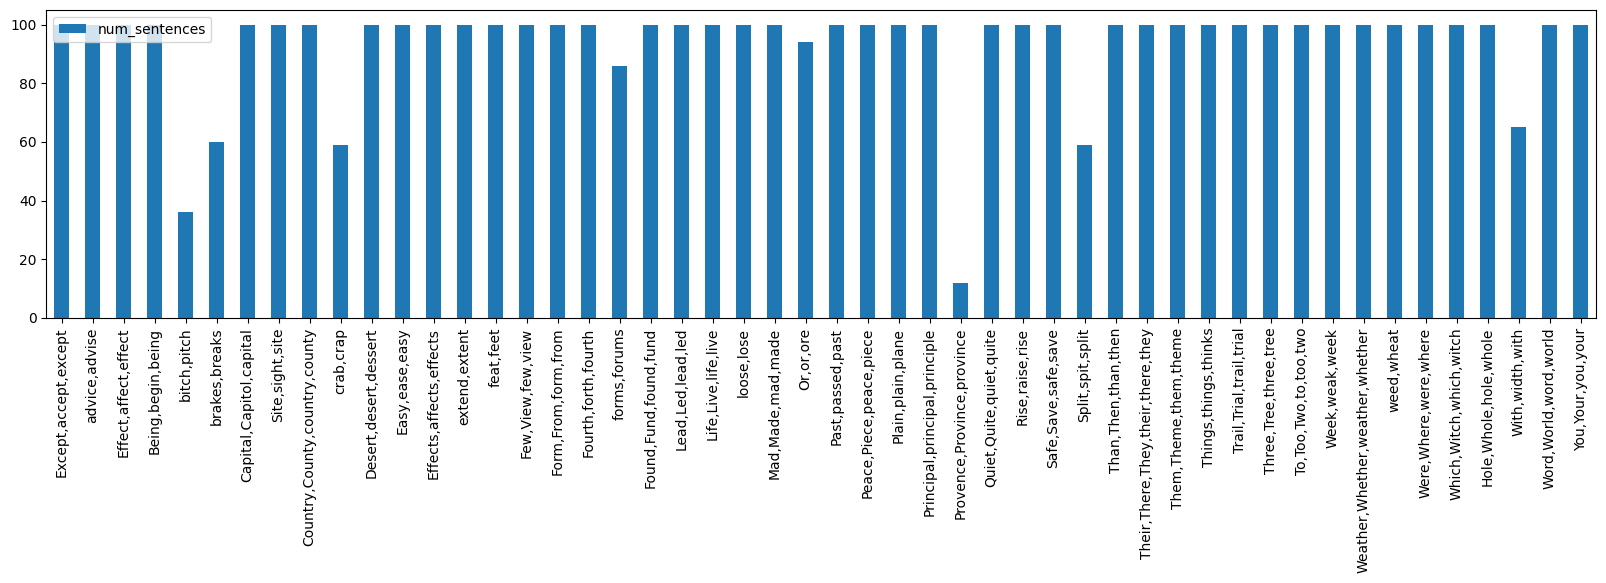

In [34]:
import pandas as pd


keys = balanced_data.keys()
values = [len(value) for value in balanced_data.values()]

tp_df = pd.DataFrame({'confusion_set':keys, 'num_sentences':values}, index=keys)
tp_df.plot(kind="bar", figsize=(20,4))